# 7장 시계열 데이터를 다뤄보자

7-1. Numpy의 polyfit으로 회귀(regression) 분석하기
pip install pandas_datareader

#python 3.6으로 가능 
conda install -c conda-forge fbprophet

In [2]:
!pip install fbprophet

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

#facebook에서 만듦
#파이썬 3.6에서 설치....3.7에서 마지막에 오류가 있었음(내의견)
#window사용자들은 Visual C++ Build Tool을 설치해야한다고 함 
from fbprophet import Prophet



ModuleNotFoundError: No module named 'fbprophet'

In [24]:
!pip install pandas_datareader

In [4]:
!pip install fbprophet

In [26]:
!pip install Cython

In [6]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

## 7-3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [28]:
!pip install fix_yahoo_finance

In [29]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '2010-03-01' 
end_date = '2019-02-10' 
df = data.get_data_yahoo('000660.KS', start_date, end_date)

df.sort_values("Date", ascending=False).head()

ModuleNotFoundError: No module named 'fix_yahoo_finance'

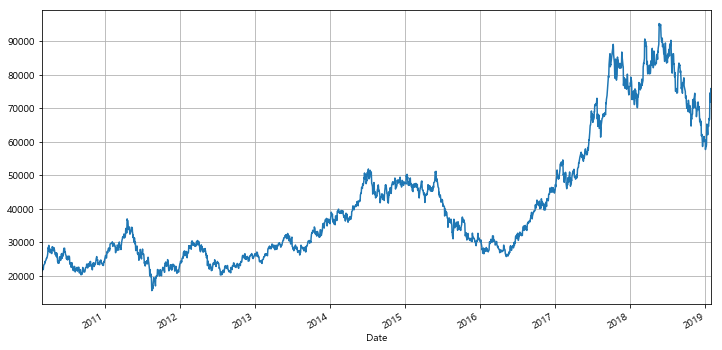

In [16]:
df['Close'].plot(figsize=(12,6), grid=True);

In [18]:
#2010-03-02 ~ 2016-12-31 까지의 데이터 
df2 = df[:'2016-12-31']
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,21500.0,21800.0,21400.0,21450.0,19561.050781,5327978
2010-03-03,21400.0,22050.0,21200.0,21850.0,19925.824219,5813582
2010-03-04,21950.0,22600.0,21900.0,22200.0,20245.001953,5386394
2010-03-05,22300.0,22650.0,22100.0,22500.0,20518.583984,4366984
2010-03-08,22900.0,22950.0,22100.0,22350.0,20381.792969,6121322
2010-03-09,22350.0,22500.0,21800.0,21850.0,19925.824219,5861290
2010-03-10,21950.0,22600.0,21900.0,22550.0,20564.183594,6428487
2010-03-11,22850.0,23400.0,22700.0,23150.0,21111.345703,10649969
2010-03-12,23350.0,23400.0,22850.0,23250.0,21202.537109,3034687


In [20]:
#2010-03-02 ~ 2016-12-31 까지의 데이터 중에 종가 추출
#일자를 index가 아닌 칼럼으로 만들고  index는 reset
df = pd.DataFrame({'ds':df.index, 'y':df['Close']})
df.reset_index(inplace=True)
del df['Date']   #일자칼럼도 지우자~  접근간단하게 하기위해 
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [19]:
m = Prophet(daily_seasonality=True)  #일일계절성?  예측해주세요~!!
m.fit(df);
m

In [23]:
#1년후 예측해보기 ............2010년~2016-12-31까지의 데이터로 2010 ~ 2017년까지의 데이터가 나옴 
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2055,2017-12-25
2056,2017-12-26
2057,2017-12-27
2058,2017-12-28
2059,2017-12-29


In [26]:
#2010 ~ 2017년까지의 예측
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2055,2017-12-25,32891.681573,13094.545631,50802.284335,15589.955105,50321.361937,-871.320462,-871.320462,-871.320462,415.766738,...,-47.048690,-47.048690,-47.048690,-1240.038510,-1240.038510,-1240.038510,0.0,0.0,0.0,32020.361112
2056,2017-12-26,32872.279152,15007.884441,50238.493428,15500.696696,50397.348144,-785.580247,-785.580247,-785.580247,415.766738,...,94.914178,94.914178,94.914178,-1296.261163,-1296.261163,-1296.261163,0.0,0.0,0.0,32086.698905
2057,2017-12-27,32852.876731,13943.161210,50402.409850,15411.438288,50469.090946,-847.992392,-847.992392,-847.992392,415.766738,...,76.301723,76.301723,76.301723,-1340.060853,-1340.060853,-1340.060853,0.0,0.0,0.0,32004.884339
2058,2017-12-28,32833.474310,13768.086097,49879.449700,15309.088507,50475.611319,-923.621009,-923.621009,-923.621009,415.766738,...,32.355898,32.355898,32.355898,-1371.743645,-1371.743645,-1371.743645,0.0,0.0,0.0,31909.853301
2059,2017-12-29,32814.071889,13523.674106,50648.679802,15228.421218,50479.432019,-1028.769770,-1028.769770,-1028.769770,415.766738,...,-52.581396,-52.581396,-52.581396,-1391.955112,-1391.955112,-1391.955112,0.0,0.0,0.0,31785.302118


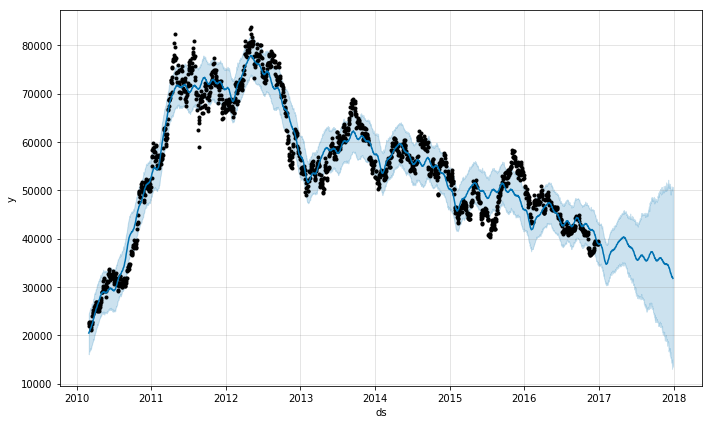

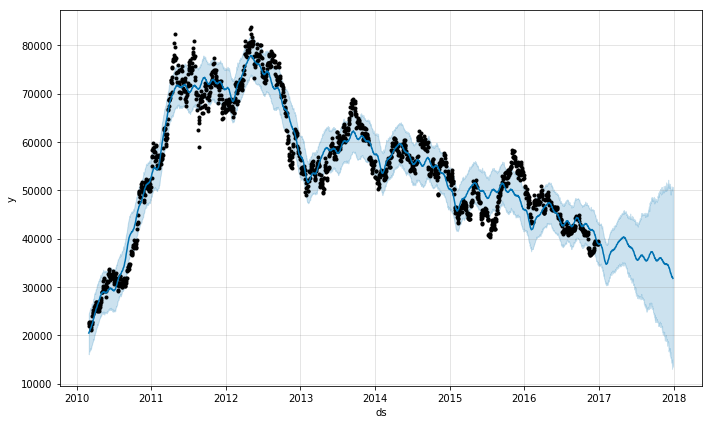

In [31]:
#검은 반점이 원 주가... 파란 실선이 예측값, 엷은 파란색의 범위가 유효 범위입니다.
m.plot(forecast)

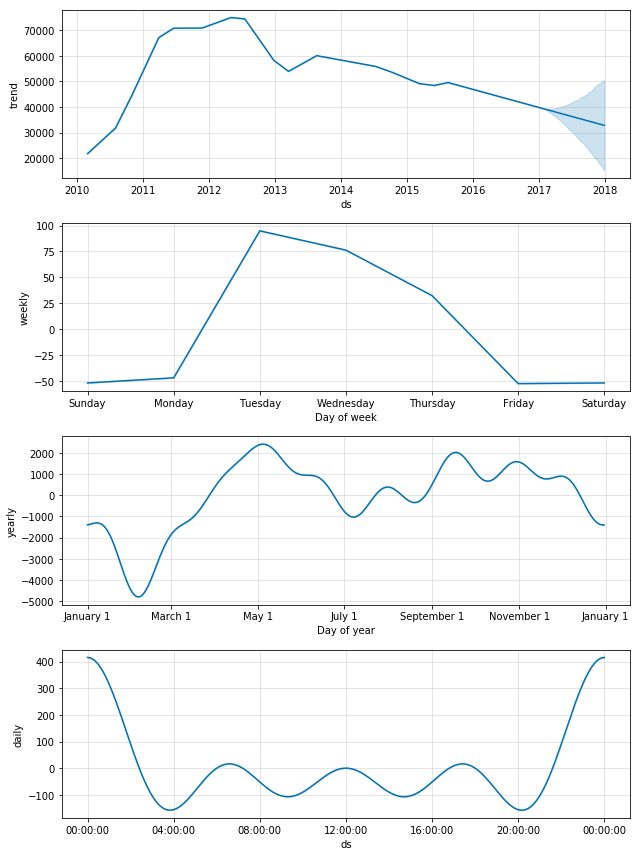

In [32]:
#요소별 확인 ... 전체적인trend, 주간(weekly), 년간(yearly) 
#구간을 보니 화요일과 수요일이 높다. 
#년중에는 2월이 낮다. 
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


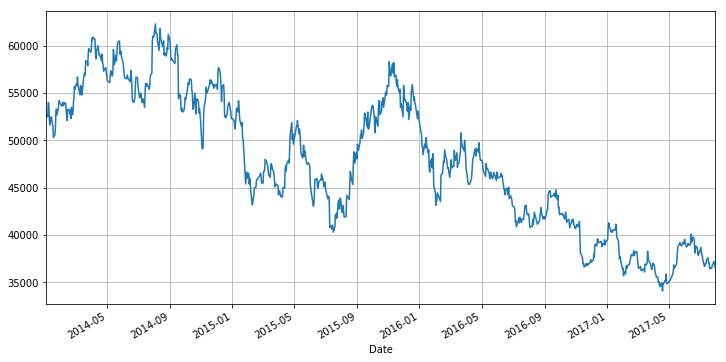

In [33]:
#날짜를 바꾸어 다시~~
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

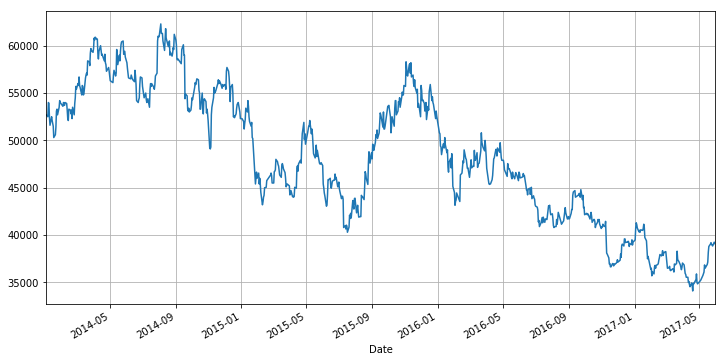

In [34]:
#2017-05-31 까지의 데이터로 예측해보자 
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [35]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [36]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [37]:
#61일간의 데이터를 예측해보자 
future = m.make_future_dataframe(periods=61)
future

,ds
0,2014-01-02
1,2014-01-03
2,2014-01-06
3,2014-01-07
4,2014-01-08
5,2014-01-09
6,2014-01-10
7,2014-01-13
8,2014-01-14
9,2014-01-15


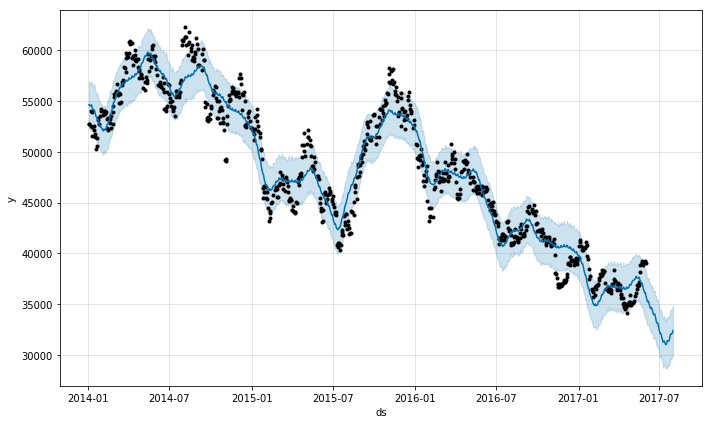

In [38]:
forecast = m.predict(future)
m.plot(forecast);

In [41]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
897,2017-07-27,32803.708729,29553.248984,34454.846316,32240.119859,33402.320582,-796.517720,-796.517720,-796.517720,1021.843401,...,22.019119,22.019119,22.019119,-1840.380240,-1840.380240,-1840.380240,0.0,0.0,0.0,32007.191009
898,2017-07-28,32780.261150,29676.991136,34478.240746,32198.668064,33395.506008,-716.968800,-716.968800,-716.968800,1021.843401,...,-28.934330,-28.934330,-28.934330,-1709.877871,-1709.877871,-1709.877871,0.0,0.0,0.0,32063.292351
899,2017-07-29,32756.813572,29683.892085,34539.367694,32138.935884,33394.533690,-687.556854,-687.556854,-687.556854,1021.843401,...,-127.730412,-127.730412,-127.730412,-1581.669843,-1581.669843,-1581.669843,0.0,0.0,0.0,32069.256718
900,2017-07-30,32733.365993,29779.548309,34593.347750,32086.447797,33388.028764,-563.059283,-563.059283,-563.059283,1021.843401,...,-127.730437,-127.730437,-127.730437,-1457.172247,-1457.172247,-1457.172247,0.0,0.0,0.0,32170.306710
901,2017-07-31,32709.918415,29881.062361,34920.051645,32030.140716,33388.021057,-338.002870,-338.002870,-338.002870,1021.843401,...,-22.208911,-22.208911,-22.208911,-1337.637360,-1337.637360,-1337.637360,0.0,0.0,0.0,32371.915545


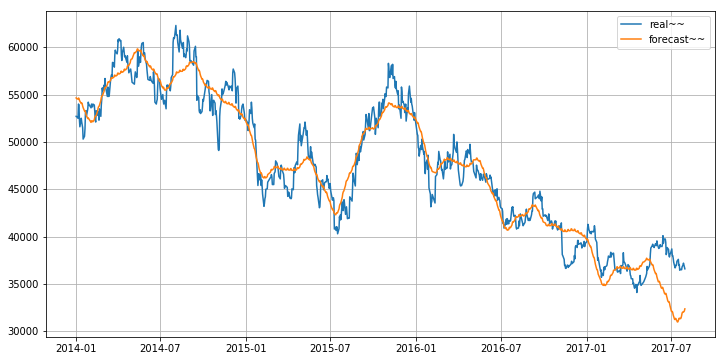

In [43]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real~~')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast~~')
plt.grid()
plt.legend()
plt.show()

## 7-4 Growth Model과 Holiday Forecast

In [34]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [35]:
df['cap'] = 8.5

In [36]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

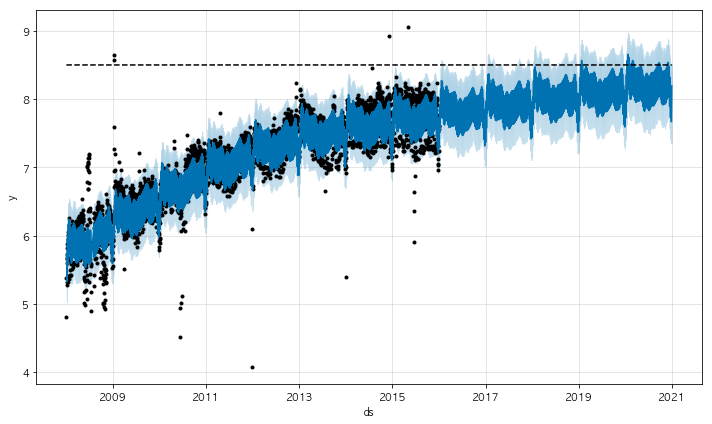

In [37]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

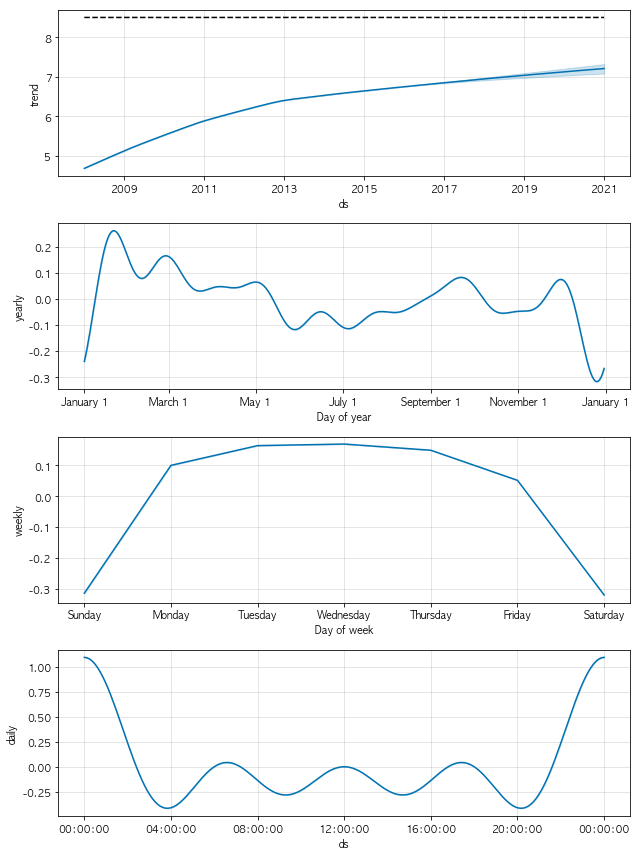

In [38]:
forecast = m.predict(future)
m.plot_components(forecast);

## holiday

In [45]:
df = pd.read_csv('data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

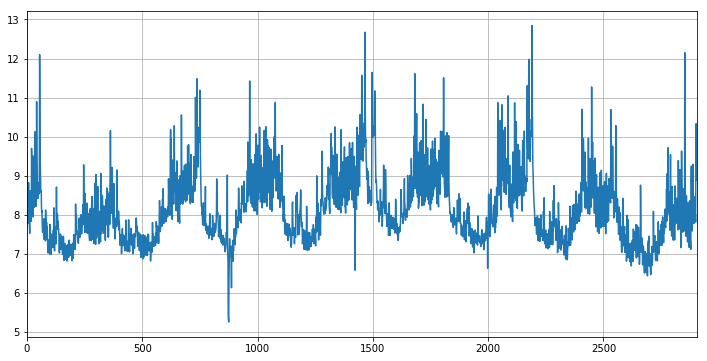

In [47]:
df.y.plot(figsize=(12,6), grid=True);

In [48]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [49]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [43]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.225683,1.174862
2191,2014-02-03,1.901161,1.456941
2532,2015-01-11,1.225683,0.000000
2533,2015-01-12,1.901161,0.000000
2901,2016-01-17,1.225683,0.000000
2902,2016-01-18,1.901161,0.000000
2908,2016-01-24,1.225683,0.000000
2909,2016-01-25,1.901161,0.000000
2922,2016-02-07,1.225683,1.174862
2923,2016-02-08,1.901161,1.456941


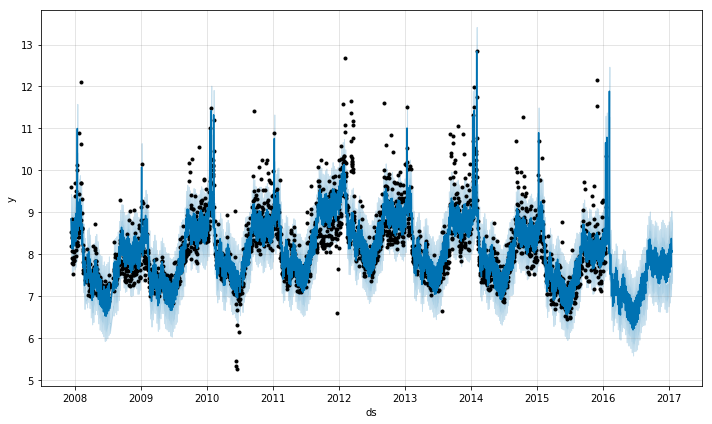

In [50]:
m.plot(forecast);

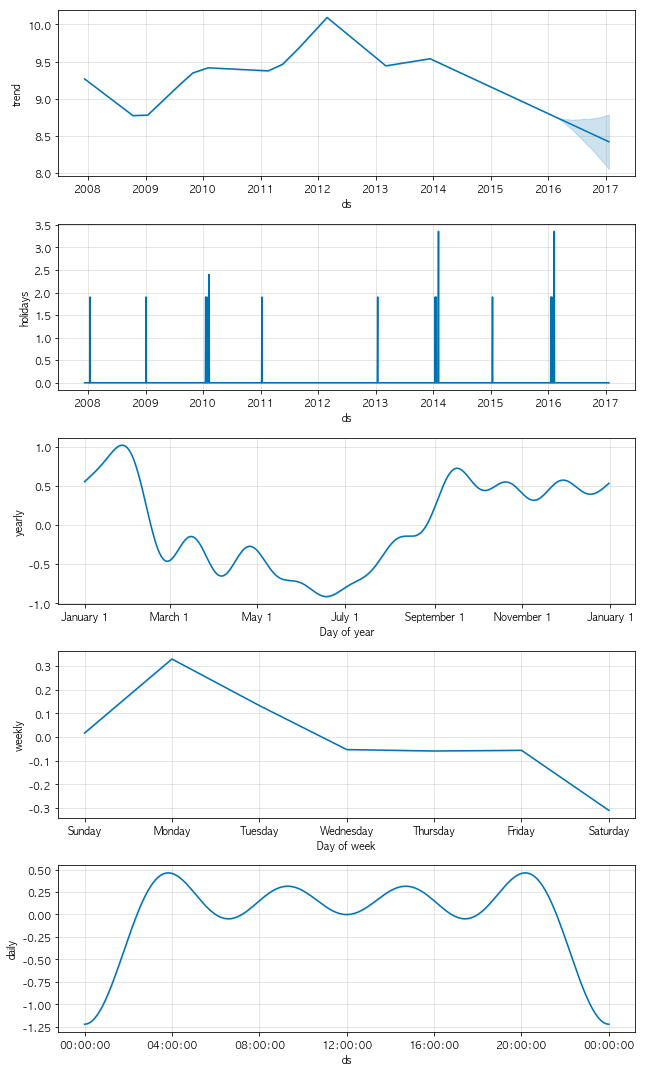

In [45]:
m.plot_components(forecast);